In [ ]:
# Test the projection convergence of our basis constructed using OMP

In [2]:
import numpy as np
import scipy as sp
import importlib
import seaborn as sns
import matplotlib.pyplot as plt
import pdb

import omp

importlib.reload(omp)

%matplotlib inline

### Collective OMP algorithm

We construct a measurement basis $W_m$ based on a given approximation basis $V_n$. Our ambient space $V$ is $H_0^1([0,1])$. Here $V_n$ is the sinusoids, normalised in $H_0^1([0,1])$, so $V_n = \mathrm{span}\{\phi_1,\ldots,\phi_n\}$, where $\phi_k = \frac{\sqrt{2}}{\pi k} \sin(k \pi x)$.

The measurements are assumed to be point evaluations, which have representer in $H_0^1$ of
$$
\omega_{x_0}(x) = \frac{1}{\sqrt{x_0 (1-x_0)}}
\begin{cases}
x (1 - x_0) & \text{for } x \le x_0 \\
(1 - x) x_0 & \text{for } x > x_0
\end{cases}
$$

This implementation of the algorithm looks at the best choice of $\omega$ from the dictionary $\mathcal{D}$ against the entire basis $V_n$, hence is called the _collective_ approach. That is, at each step of the algorithm choose
$$
\omega_k 
= \mathrm{argmax}_{\omega\in\mathcal{D}} |\left\langle \omega, v - P_{W_{k-1}} v \right\rangle| 
= \mathrm{argmax}_{\omega\in\mathcal{D}} \| P_{V_n} (\omega - P_{W_{k-1}} \omega ) \|
= \mathrm{argmax}_{\omega\in\mathcal{D}} \sum_{i=1}^n |\left\langle \phi_i - P_{W_{k-1}}\phi_i, \omega \right\rangle|^2
$$
It is precisely the last expression on the right that is used in the code.

In [ ]:
N = 1e3
dictionary = omp.make_unif_dictionary(N)

np.random.seed(3)
n = 20
m = 200
Vn = omp.make_sin_basis(n)

gbc = omp.GreedyBasisConstructor(m, dictionary, Vn, verbose=True)
Wm_omp = gbc.construct_basis()
#omp_x = [0.47605239476052397, 0.019098090190980903, 0.98160183981601845, 0.92810718928107194, 0.071092890710928905, 0.12328767123287672, 0.87771222877712229, 0.82611738826117398, 0.17258274172582744, 0.22417758224177584, 0.77712228777122294, 0.72552744725527452, 0.27247275272472754, 0.32456754324567544, 0.6773322667733227, 0.6252374762523748, 0.37146285371462856, 0.42485751424857515, 0.57854214578542151, 0.52494750524947509, 0.96750324967503254, 0.032896710328967106, 0.084591540845915414, 0.91490850914908517, 0.0083991600839916011, 0.9919008099190082, 0.86481351864813527, 0.13578642135786423, 0.18528147185281474, 0.9392060793920608, 0.11118888111188882, 0.38496150384961508, 0.81401859814018607, 0.76462353764623536, 0.56504349565043499, 0.28527147285271476, 0.060493950604939506, 0.83851614838516153, 0.88921107889211082, 0.6646335366463354, 0.97500249975002506, 0.21167883211678834, 0.23627637236276375, 0.7381261873812619, 0.025497450254974505, 0.31196880311968805, 0.16098390160983903, 0.6379362063793621, 0.53774622537746231, 0.71372862713728635, 0.41215878412158785, 0.33666633336666335, 0.7889211078892111, 0.95930406959304071, 0.61323867613238681, 0.46435356464353567, 0.43775622437756229, 0.040995900409959006, 0.26097390260973902, 0.68893110688931114, 0.51374862513748631, 0.48835116488351166, 0.36056394360563948, 0.013498650134986502, 0.58944105589441054, 0.98700129987001306, 0.077592240775922416, 0.92170782921707839, 0.87141285871412866, 0.091990800919908008, 0.12938706129387062, 0.9078092190780922, 0.93360663933606647, 0.17878212178782124, 0.11738826117388262, 0.065893410658934115, 0.83211678832116798, 0.37806219378062195, 0.82021797820217979, 0.57194280571942813, 0.77102289771022903, 0.88331166883311674, 0.27877212278772123, 0.85781421857814222, 0.21807819218078192, 0.67113288671132887, 0.97140285971402862, 0.23007699230076994, 0.73162683731626843, 0.028997100289971003, 0.16698330166983302, 0.31846815318468152, 0.43115688431156884, 0.14248575142485753, 0.63143685631436863, 0.53114688531146892, 0.41865813418658138, 0.19228077192280774, 0.78282171782821719, 0.97840215978402167]
#Wm_omp = omp.Basis(vecs=[omp.Vector([x], [1.0], ['H1delta']) for x in omp_x])
fWm_omp_o = Wm_omp.orthonormalise()

Wm_rand = omp.make_random_delta_basis(m)
Wm_rand_o = Wm_rand.orthonormalise()

### Now we look at $\beta(V_n, W_m)$ for our collective OMP basis and a random basis for comparison

In [ ]:
b_omp = np.zeros(m - n)
b_rand = np.zeros(m - n)

for i in range(n, m):
    BP_omp = omp.BasisPair(Wm_omp_o.subspace(slice(0,i)), Vn)
    FB_omp = BP_omp.make_favorable_basis()
    b_omp[i - (n)] = FB_omp.beta()
    
    BP_rand = omp.BasisPair(Wm_rand_o.subspace(slice(0,i)), Vn)
    FB_rand = BP_rand.make_favorable_basis()
    b_rand[i - (n)] = FB_rand.beta()

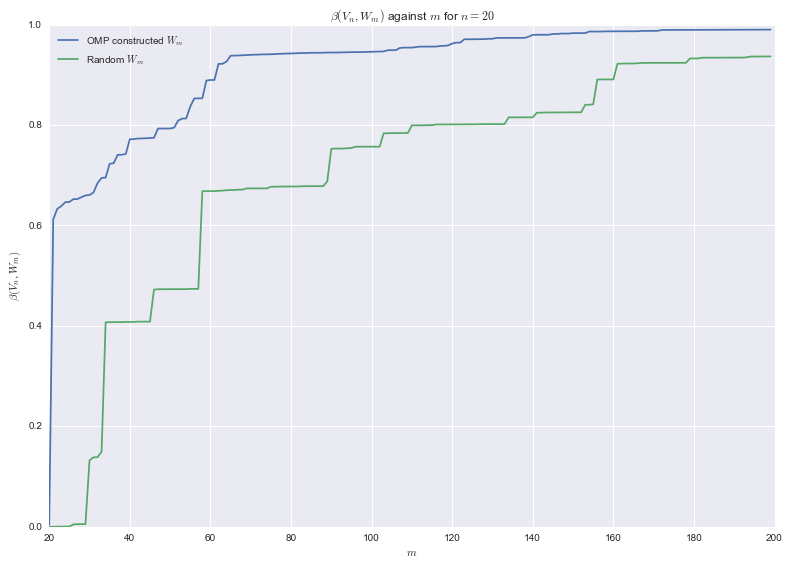

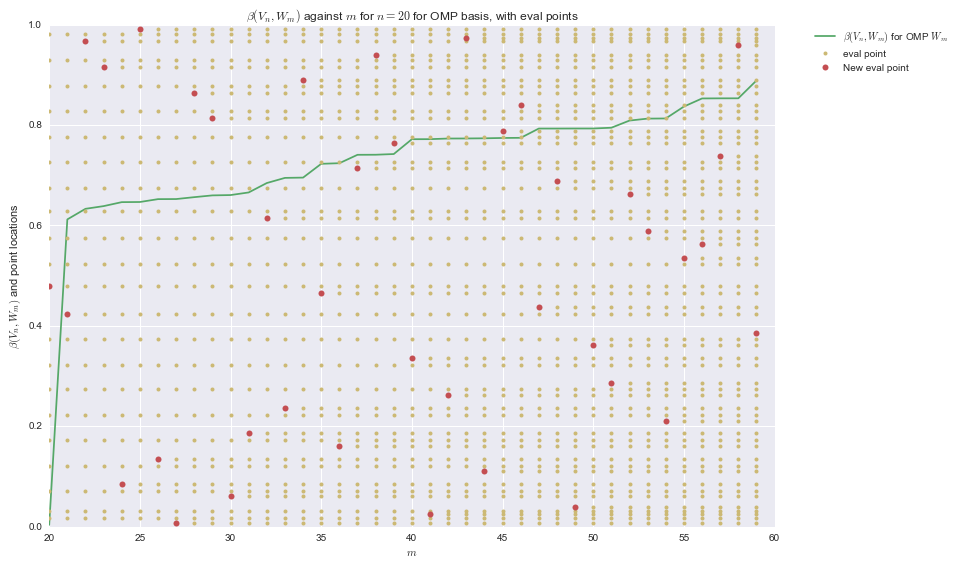

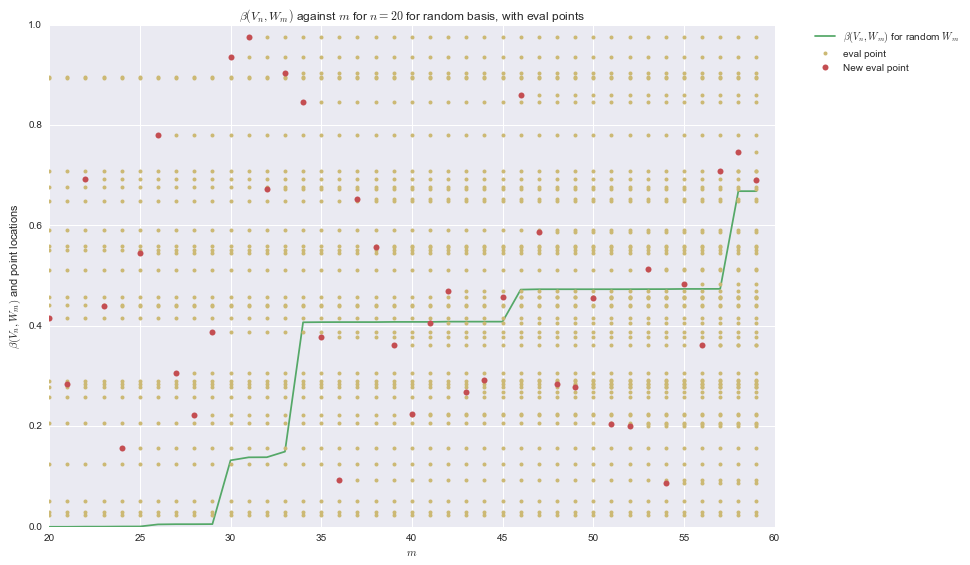

In [18]:
sns.set_palette("deep")
cp = sns.color_palette()

axs = []
fig = plt.figure(figsize=(13, 9))
ax = fig.add_subplot(1, 1, 1, title=r'$\beta(V_n, W_m)$ against $m$ for $n={{{0}}}$'.format(n))

plt.plot(range(n,m), b_omp, label=r'OMP constructed $W_m$')
plt.plot(range(n,m), b_rand, label=r'Random $W_m$')

ax.set(xlabel=r'$m$', ylabel=r'$\beta(V_n, W_m)$')
plt.legend(loc=2)
plt.show()


# Plot the evaluation points in the Wm_rand basis 
# (note that the basis is infact orthonormalised so this isn't *quite* an accurate picture)
Wm_points = [vec.params[0][0] for vec in Wm_omp.vecs]

axs = []
fig = plt.figure(figsize=(13, 9))
ax = fig.add_subplot(1, 1, 1, title=r'$\beta(V_n, W_m)$ against $m$ for $n={{{0}}}$ for OMP basis, with eval points'.format(n))
ax.set(xlabel=r'$m$', ylabel=r'$\beta(V_n, W_m)$ and point locations')
plt.plot(range(n,n+40), b_omp[:40], color=cp[1], label=r'$\beta(V_n, W_m)$ for OMP $W_m$')

plt.plot(n * np.ones(n-1), Wm_points[:n-1], 'o', color=cp[4], markersize=4, label='eval point')
plt.plot(n, Wm_points[n-1], 'o', color=cp[2], markersize=6, label='New eval point')
for m_plot in range(n, n+40-1):
    plt.plot((m_plot+1) * np.ones(m_plot), Wm_points[:m_plot], 'o', color=cp[4], markersize=4)
    plt.plot(m_plot+1, Wm_points[m_plot], 'o', color=cp[2], markersize=6)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()


# Plot the evaluation points in the Wm_rand basis 
# (note that the basis is infact orthonormalised so this isn't *quite* an accurate picture)
Wm_points = [vec.params[0][0] for vec in Wm_rand.vecs]
Wm_o_coeffs = [vec.coeffs[0] for vec in Wm_rand_o.vecs]

axs = []
fig = plt.figure(figsize=(13, 9))
ax = fig.add_subplot(1, 1, 1, title=r'$\beta(V_n, W_m)$ against $m$ for $n={{{0}}}$ for random basis, with eval points'.format(n))
ax.set(xlabel=r'$m$', ylabel=r'$\beta(V_n, W_m)$ and point locations')
plt.plot(range(n,n+40), b_rand[:40], color=cp[1], label=r'$\beta(V_n, W_m)$ for random $W_m$')

plt.plot(n * np.ones(n-1), Wm_points[:n-1], 'o', color=cp[4], markersize=4, label='eval point')
plt.plot(n, Wm_points[n-1], 'o', color=cp[2], markersize=6, label='New eval point')
for m_plot in range(n, n+40-1):
    plt.plot((m_plot+1) * np.ones(m_plot), Wm_points[:m_plot], 'o', color=cp[4], markersize=4)
    plt.plot(m_plot+1, Wm_points[m_plot], 'o', color=cp[2], markersize=6)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()


In [13]:
Wm_omp.vecs[0].fn_types

['H1delta']